In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from derivative import dxdt

In [11]:
SIGMA = 10
RHO = 28
BETA = 8/3

In [37]:
def lorenz(_,u,sigma,rho,beta):

    x = u[0]
    y = u[1]
    z = u[2]

    dx_dt = sigma * (y-x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z

    return np.hstack((dx_dt,dy_dt,dz_dt))

In [112]:
def gen_u(t):

    u0 = np.array([0,8,27])
    result = solve_ivp(fun=lorenz,t_span=(t[0],t[-1]),y0=u0,t_eval=t,args=(SIGMA,RHO,BETA))
    u = result.y.T

    return u

In [113]:
t0 = 0.001
dt = 0.001
tmax = 100
n = int(tmax/dt)
t = np.linspace(start=t0,stop=tmax,num=n)
gen_u(t)

array([[ 0.        ,  8.        , 27.        ],
       [ 0.07956161,  7.99204574, 26.92841425],
       [ 0.15825291,  7.98418981, 26.85765005],
       ...,
       [-1.16464749, -1.90095654, 12.97147273],
       [-1.1720523 , -1.91662486, 12.93915545],
       [-1.17953972, -1.93242758, 12.90695686]])

In [114]:
def finite_diff(u,t):

    uprime = dxdt(u.T,t,kind="finite_difference",k=1).T
    return uprime

In [115]:
def generate_data():

    t0 = 0.001
    dt = 0.001
    tmax = 100
    n = int(tmax/dt)
    t = np.linspace(start=t0,stop=tmax,num=n)

    u = gen_u(t)
    uprime = finite_diff(u,t)

    return (u,uprime)

In [116]:
U,Uprime = generate_data()

In [133]:
x,y,z = U.T

Text(0.5, 0.92, 'Lorenz attractor')

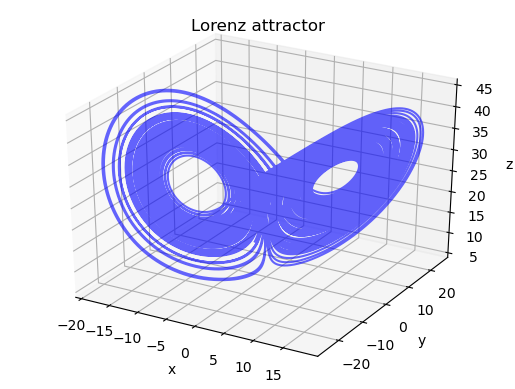

In [135]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z,color="blue",alpha=0.6)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Lorenz attractor")

In [118]:
def create_library(U,poly_order=2):

    (m,n) = U.shape
    theta = np.ones((m,1))

    #polynomial_order_1
    theta = np.hstack((theta,U))

    #polynomial_order_2
    if poly_order >= 2:
        for i in range(n):
            for j in range(i,n):
                theta = np.hstack((theta,U[:,i:i+1]*U[:,j:j+1]))

    #polynomial_order_3
    if poly_order>=3:
        for i in range(n):
            for j in range(i,n):
                for k in range(j,n):
                    theta = np.hstack((theta,U[:,i:i+1]*U[:,j:j+1]*U[:,k:k+1]))


    #polynomial_order_4
    if poly_order>=4:
        for i in range(n):
            for j in range(i,n):
                for k in range(j,n):
                    for l in range(k,n):
                        theta = np.hstack((theta,U[:,i:i+1]*U[:,j:j+1]*U[:,k:k+1]*U[:,l:l+1]))


    return theta

In [119]:
Theta = create_library(U)

In [120]:
def regress(theta,uprime,threshold,max_iter):

    xi = np.linalg.lstsq(theta,uprime,rcond=None)[0]
    n = xi.shape[1]

    for _ in range(max_iter):
        small_indices = np.abs(xi) < threshold
        xi[small_indices] = 0
        
        for j in range(n):
            big_indices = np.logical_not(small_indices[:,j])
            xi[big_indices,j] = np.linalg.lstsq(theta[:,big_indices],uprime[:,j],rcond=None)[0]

    return xi

In [128]:
Xi = regress(Theta,Uprime,0.025,10)

In [130]:
Xi[:,0]

array([  0.        , -10.00446074,  10.00428337,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ])